In [75]:
%pylab inline
import pandas as pd
import seaborn as sns
import scipy
import skimage


# df = pd.read_excel("C:/Users/Jirik/data/medical/processed/SA_experiments.xlsx")
df = pd.read_excel("C:/Users/Jirik/data/medical/processed/scaffan2019/metacentrum/SA_experiments.xlsx")
df

Populating the interactive namespace from numpy and matplotlib


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,Annotation Color,Annotation Details,Annotation ID,Annotation Title,Area,Area unit,Branch number,Central Vein Dice,Central Vein Jaccard,Central vein area,...,Processing;Skeleton Analysis;Working Resolution,Processing;Texture Analysis;GLCM Levels,Processing;Texture Analysis;Tile Size,Processing;Texture Analysis;Tile Spacing,Processing;Texture Analysis;Working Resolution,Scaffan Version,Skeleton length,platform.node,platform.processor,platform.system
0,#00FF00,PFCVI=1 SNI=0 SWP=0,1,NaN,0.681016,mm,7686.0,1.000000,1.000000,0.008066,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,15.85402,elmo5-13.hw.elixir-czech.cz,NaN,Linux
1,#00FF00,PFCVI=1 SNI=0 SWP=0,2,NaN,0.968983,mm,7648.0,1.000000,1.000000,0.005598,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,14.98133,elmo5-13.hw.elixir-czech.cz,NaN,Linux
2,#00FF00,PFCVI=1 SNI=0 SWP=0,6,NaN,1.192457,mm,5387.0,1.000000,1.000000,0.002716,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,10.14741,elmo5-13.hw.elixir-czech.cz,NaN,Linux
3,#00FF00,PFCVI=1 SNI=0 SWP=0,9,NaN,1.756423,mm,12800.0,1.000000,1.000000,0.026787,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,25.96321,elmo5-13.hw.elixir-czech.cz,NaN,Linux
4,#00FF00,PFCVI=1 SNI=0 SWP=0,10,NaN,1.011402,mm,9243.0,1.000000,1.000000,0.000162,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,17.64581,elmo5-13.hw.elixir-czech.cz,NaN,Linux
5,#00FF00,PFCVI=1 SNI=0 SWP=0,1,NaN,1.577474,mm,NaN,0.119954,0.063804,0.122824,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
6,#00FF00,PFCVI=1 SNI=0 SWP=0,2,NaN,1.040017,mm,NaN,0.076893,0.039984,0.140005,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
7,#00FF00,PFCVI=1 SNI=0 SWP=0,6,NaN,1.192378,mm,NaN,0.037776,0.019252,0.141088,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
8,#00FF00,PFCVI=1 SNI=0 SWP=0,9,NaN,1.527437,mm,NaN,0.151715,0.082084,0.317301,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux
9,#00FF00,PFCVI=1 SNI=0 SWP=0,10,NaN,0.970199,mm,NaN,0.011015,0.005538,0.023293,...,9.100000e-07,64,64,32,4.000000e-07,0.11.0,NaN,elmo5-12.hw.elixir-czech.cz,NaN,Linux


In [76]:
def get_col_from_ann_details(df, colname):
    df[f"{colname}"] = pd.to_numeric(df["Annotation Details"].str.extract(f'{colname}=(\d*\.?\d*)')[0])
    return df
get_col_from_ann_details(df, "PFCVI")
get_col_from_ann_details(df, "SNI")
get_col_from_ann_details(df, "SWP");
get_col_from_ann_details(df, "CMP");

df["Sum Semi-q"] = df["PFCVI"] + df["SNI"] + df["SWP"]

In [77]:
df.keys()

Index(['Annotation Color', 'Annotation Details', 'Annotation ID',
       'Annotation Title', 'Area', 'Area unit', 'Branch number',
       'Central Vein Dice', 'Central Vein Jaccard', 'Central vein area',
       'Datetime', 'Dead ends number', 'Experiment Datetime',
       'Experiment Title', 'File Name', 'File Path', 'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var', 'Input;Data Info', 'Input;File Path',
       'Lobulus Border Dice', 'Lobulus Border Jaccard',
       'Lobulus Boundary Compactness', 'Lobulus Boundary Noncompactness',
       'Lobulu

# Lobulus Structure Analysis

In [78]:
np.unique(df["Scaffan Version"])

array(['0.11.0', '0.11.1', '0.11.2', '0.11.3', '0.12.1', '0.13.2'],
      dtype=object)

In [79]:
dfselector =  (df["Experiment Title"] == "first area evaluation") & (df["Scaffan Version"] == "0.13.2")
dfcor = df[dfselector
][["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation", "Skeleton length", 
            "PFCVI", 
            "SNI", 
            "SWP", 
   "CMP",
   "Annotation Details"
#             "Sum Semi-q", 
#    "Experiment Title", "Scaffan Version"
  ]]
dfcor

,Branch number,GLCM Energy,GLCM Homogenity,GLCM Correlation,Skeleton length,PFCVI,SNI,SWP,CMP,Annotation Details
355,7686.0,0.822623,0.916569,0.672097,15.85402,1.0,0.0,0.0,0.9,PFCVI=1 SNI=0 SWP=0 CMP=0.9
356,7648.0,0.807898,0.911466,0.597712,14.98133,1.0,0.0,0.0,0.9,PFCVI=1 SNI=0 SWP=0 CMP=0.9
357,5387.0,0.861441,0.938972,0.512141,10.14741,1.0,0.0,0.0,0.9,PFCVI=1 SNI=0 SWP=0 CMP=0.9
358,12800.0,0.850319,0.930178,0.566942,25.96321,1.0,0.0,0.0,0.9,PFCVI=1 SNI=0 SWP=0 CMP=0.9
359,9243.0,0.770913,0.900913,0.654881,17.64581,1.0,0.0,0.0,0.9,PFCVI=1 SNI=0 SWP=0 CMP=0.9
360,16729.0,0.416848,0.748294,0.844131,32.70995,1.0,2.0,0.0,0.7,PFCVI=1 SNI=2 SWP=0 CMP=0.7
361,20401.0,0.462324,0.757948,0.852780,40.62149,1.0,2.0,0.0,0.7,PFCVI=1 SNI=2 SWP=0 CMP=0.7
362,18418.0,0.482696,0.786622,0.868614,34.07950,2.0,2.0,1.0,0.5,PFCVI=2 SNI=2 SWP=1 CMP=0.5
363,8021.0,0.470742,0.765599,0.846888,15.06869,2.0,1.0,1.0,0.6,PFCVI=2 SNI=1 SWP=1 CMP=0.6
364,25036.0,0.553436,0.819394,0.850074,49.65142,1.0,1.0,0.0,0.6,PFCVI=1 SNI=1 SWP=0 CMP=0.6


## Correlation analysis

In [80]:
# ### Pearson correlation coefficient

# Absolute Pearson Correlation - usefull for linear



In [81]:
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('pearson').abs().style.background_gradient(cmap=cm, low=0, high=1)

### Spearman correlation coefficient

Absolute Spearman Correlation 

In [82]:
features = [
    "Branch number", "Skeleton length",
                                  'GLCM Correlation',
       'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
       'GLCM Correlation p75', 'GLCM Correlation p90', 'GLCM Correlation var',
       'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
       'GLCM Energy p75', 'GLCM Energy p90', 'GLCM Energy var',
       'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
       'GLCM Homogenity p50', 'GLCM Homogenity p75', 'GLCM Homogenity p90',
       'GLCM Homogenity var',
        'Lobulus Boundary Compactness',    
           ]

In [136]:
# cm =sns.color_palette("coolwarm", 7, as_cmap=True)
cm = sns.light_palette("green", as_cmap=True)
# cm = sns.light_palette("green", as_cmap=True)
# dfcor.corr('spearman').abs().style.background_gradient(cmap=cm, low=0, high=1)
cor = df[dfselector][[
        "PFCVI", "SNI", "SWP", "CMP",
        *features
]].corr('spearman').abs()[4:][[
    "PFCVI", "SNI", "SWP", "CMP",
#                                   "Sum Semi-q"
                                 ]].style.background_gradient(
    cmap=cm, 
#     cmap=plt.cm.Reds, 
    low=0, high=1)
cor
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)


,PFCVI,SNI,SWP,CMP
Branch number,0.0700658,0.21168,0.134584,0.606483
Skeleton length,0.016169,0.272508,0.0567434,0.628341
GLCM Correlation,0.522799,0.579079,0.319727,0.471355
GLCM Correlation p10,0.50124,0.570563,0.256437,0.466984
GLCM Correlation p25,0.415005,0.493921,0.188781,0.482881
GLCM Correlation p50,0.436564,0.502436,0.245888,0.509112
GLCM Correlation p75,0.468902,0.510952,0.260438,0.521432
GLCM Correlation p90,0.490461,0.474456,0.243342,0.513086
GLCM Correlation var,0.555137,0.757913,0.482683,0.319934
GLCM Energy,0.253315,0.562048,0.307724,0.423266


In [114]:

best_features = [
#     "Branch number", "Skeleton length",
#                                   'GLCM Correlation',
#        'GLCM Correlation p10', 'GLCM Correlation p25', 'GLCM Correlation p50',
#        'GLCM Correlation p75', 'GLCM Correlation p90', 
    'GLCM Correlation var',
#        'GLCM Energy', 'GLCM Energy p10', 'GLCM Energy p25', 'GLCM Energy p50',
#        'GLCM Energy p75', 
    'GLCM Energy p90', 
#     'GLCM Energy var',
#        'GLCM Homogenity', 'GLCM Homogenity p10', 'GLCM Homogenity p25',
#        'GLCM Homogenity p50', 'GLCM Homogenity p75', 
    'GLCM Homogenity p90',
#        'GLCM Homogenity var',
        'Lobulus Boundary Compactness',    
           ]

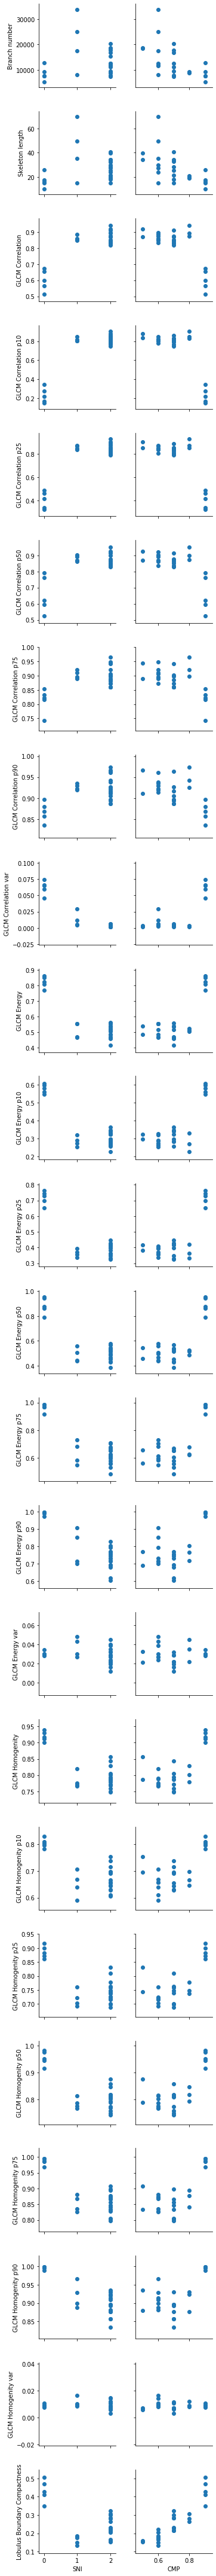

In [84]:
# iris = sns.load_dataset("iris")
g = sns.PairGrid(
    df[dfselector], y_vars=[
        *features
    ], 
    x_vars=[
#     "PFCVI", 
        "SNI", 
#         "SWP", 
        "CMP"
#     "Sum Semi-q", 
    ])
g.map(plt.scatter);

In [85]:
df[["Branch number", "GLCM Energy", "GLCM Homogenity", "GLCM Correlation"]].corrwith(df[["Skeleton length", "PFCVI", "SNI", "SWP", "Sum Semi-q"]])

Branch number      NaN
GLCM Correlation   NaN
GLCM Energy        NaN
GLCM Homogenity    NaN
PFCVI              NaN
SNI                NaN
SWP                NaN
Skeleton length    NaN
Sum Semi-q         NaN
dtype: float64

# Regression

## Feature selection

In [124]:
dff = df[dfselector][features]
X = dff.values
y = df[dfselector]["SNI"].values

display(X.shape)
display(y.shape)

(26, 24)

(26,)

In [128]:
from sklearn.feature_selection import f_regression, mutual_info_regression
mutual_info_regression(X, y)

array([0.09036502, 0.1600563 , 0.53968397, 0.51601181, 0.53582021,
       0.27702671, 0.45175427, 0.32802926, 0.53924356, 0.45075399,
       0.4951062 , 0.54326485, 0.42110656, 0.45902316, 0.47815596,
       0.10635081, 0.4610104 , 0.42694257, 0.42878001, 0.44814314,
       0.42190784, 0.47947414, 0.08493721, 0.57663399])

In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
display(reg.score(X, y))
display(reg.coef_)

display(reg.intercept_)
print("predict")
# display(reg.predict([X[:,5]]))
# y[5]


0.9994862950361544

array([-2.51480639e-04,  1.38869327e-01, -2.13091325e+02,  4.97144209e+01,
       -3.25272750e+01,  6.48074478e+01,  5.20148329e+01,  7.44718644e+01,
       -4.82705585e+02, -3.84449410e+02,  1.61309979e+02,  2.20724040e+02,
        8.47007269e+01, -3.01312924e+01, -2.72286543e+01,  1.79394606e+03,
       -5.48874242e+02, -1.04828707e+02,  2.52416819e+01,  1.43392108e+02,
        3.13481222e+02,  1.02430402e+02, -4.01816843e+03, -4.51600479e+00])

57.486585767013885

predict


In [126]:
# sl = slice(5,)
sl = [5,10,15]
display(X[sl, :])
display(y[sl])
display(reg.predict(X[sl,:]))

array([[1.67290000e+04, 3.27099500e+01, 8.44130589e-01, 8.00512695e-01,
        8.25272184e-01, 8.49096879e-01, 8.72812632e-01, 8.96201330e-01,
        3.20894032e-03, 4.16847642e-01, 2.83429289e-01, 3.28730296e-01,
        3.87742058e-01, 4.83386734e-01, 6.01141768e-01, 1.66022443e-02,
        7.48294161e-01, 6.53987144e-01, 6.97997690e-01, 7.44069904e-01,
        7.97069512e-01, 8.56433132e-01, 6.32324420e-03, 3.21333691e-01],
       [3.37980000e+04, 6.97587800e+01, 8.84175801e-01, 8.45898654e-01,
        8.68352824e-01, 8.90969576e-01, 9.10881970e-01, 9.29623686e-01,
        4.01358161e-03, 4.67210930e-01, 2.73098598e-01, 3.35359586e-01,
        4.36853952e-01, 5.83460577e-01, 7.12001054e-01, 3.01181926e-02,
        7.74761266e-01, 6.68419843e-01, 7.21408332e-01, 7.76950307e-01,
        8.34629628e-01, 8.87777277e-01, 8.51243327e-03, 1.49434126e-01],
       [1.17980000e+04, 2.39557500e+01, 8.73298879e-01, 8.22201934e-01,
        8.41597164e-01, 8.67384021e-01, 9.06624781e-01, 9.3795

array([2., 1., 2.])

array([2.00057337, 1.0070528 , 2.03419561])

## Try automatic selection

In [160]:
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
dff = df[dfselector][features]
Xf = dff.values


# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# clf = LassoCV(cv=5)
clf = LassoCV()
# clf = LinearSVC()
clf = LinearRegression()


# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, max_features=3)#, threshold=0.1)
sfm.fit(Xf, y)
Xt = sfm.transform(Xf)
Xt.shape

clf.fit(Xt, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
sl = [5,10,15]
display(Xt[sl, :])
display(y[sl])
display(clf.predict(Xt[sl,:]))

array([[0.01660224, 0.74829416, 0.00632324],
       [0.03011819, 0.77476127, 0.00851243],
       [0.03905872, 0.78739762, 0.01410142]])

array([2., 1., 2.])

array([2.23596049, 1.97113495, 1.49533114])